## Model training - correlation based variable pool with RTMA+LOCOMOS data

### Set up/check environment

In [2]:
# check python environment
!conda info


     active environment : WM_ML
    active env location : /opt/anaconda3/envs/WM_ML
            shell level : 1
       user config file : /Users/jilliancheck/.condarc
 populated config files : /Users/jilliancheck/.condarc
          conda version : 24.11.3
    conda-build version : 24.5.1
         python version : 3.12.4.final.0
                 solver : libmamba (default)
       virtual packages : __archspec=1=m1
                          __conda=24.11.3=0
                          __osx=15.3.1=0
                          __unix=0=0
       base environment : /opt/anaconda3  (writable)
      conda av data dir : /opt/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/osx-arm64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-arm64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /opt/anaconda3/pkgs
   

In [3]:
import numpy as np
from numpy import mean
import pandas as pd
import pydot
import graphviz
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score

# set the number of maximum displayed rows for printed dataframes to 1000
pd.set_option('display.max_rows', 15000)

In [4]:
x_train = pd.read_csv('')
y_train = pd.read_csv('')
x_test = pd.read_csv('')
y_test = pd.read_csv('')

# Check data sets and their lengths
print('x training data, n =', len(x_train))
print('y training data, n =', len(y_train))
print('x test data, n =', len(x_test))
print('y test data, n =', len(y_test))

x training data, n = 117
y training data, n = 117
x test data, n = 30
y test data, n = 30


In [5]:
# define cross validation scheme
cv=StratifiedShuffleSplit(n_splits=5, test_size=0.20, random_state=42)

## Alg 1: Binomial Logistic Regression

In [6]:
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix

### Stepwise selection method and feature selection

In [7]:
# Comparing selection methods (forwards vs backwards, floating vs not) and optimizing the number of features included

lr = linear_model.LogisticRegression(random_state=42)

# SFS
sfs = SequentialFeatureSelector(lr,
          k_features=(1,8), 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=cv,
          n_jobs=-1)
sfs = sfs.fit(x_train, y_train.values.ravel())

print('\nSequential Forward Selection:')
print(len(sfs.k_feature_idx_), 'features;', sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)

# SBS
sbs = SequentialFeatureSelector(lr,
          k_features=(1,8), 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=cv,
          n_jobs=-1)
sbs = sbs.fit(x_train, y_train.values.ravel())

print('\nSequential Backward Selection:')
print(len(sbs.k_feature_idx_), 'features;', sbs.k_feature_names_)
print('CV Score:')
print(sbs.k_score_)

# SFFS
sffs = SequentialFeatureSelector(lr,
           k_features=(1,8), 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)
sffs = sffs.fit(x_train, y_train.values.ravel())

print('\nSequential Forward Floating Selection:')
print(len(sffs.k_feature_idx_), 'features;', sffs.k_feature_names_)
print('CV Score:')
print(sffs.k_score_)

# SBFS
sbfs = SequentialFeatureSelector(lr,
           k_features=(1,8), 
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)
sbfs = sbfs.fit(x_train, y_train.values.ravel())

/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selecti


Sequential Forward Selection:
2 features; ('soil type', 'MA_SumSM_IR')
CV Score:
0.7416666666666667

Sequential Backward Selection:
6 features; ('soil type', 'MA_MaxRH86', 'MA_SumATD', 'MA_SumRF_IBM', 'MA_MaxWS', 'MA_MaxST_IR')
CV Score:
0.725


/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selecti


Sequential Forward Floating Selection:
2 features; ('soil type', 'MA_SumSM_IR')
CV Score:
0.7416666666666667


/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selecti


Sequential Backward Floating Selection:
2 features; ('soil type', 'MA_SumSM_IR')
CV Score:
0.7416666666666667


/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selecti

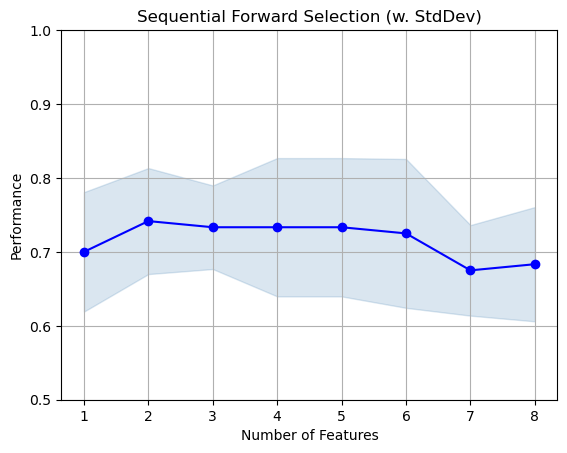

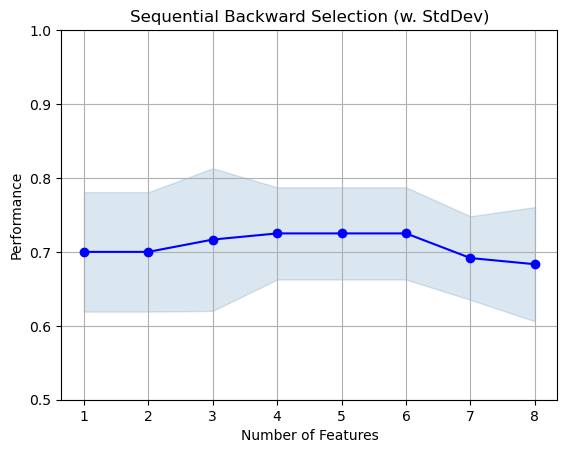

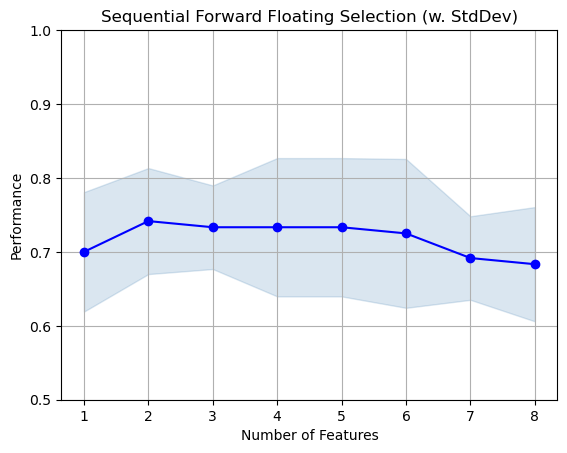

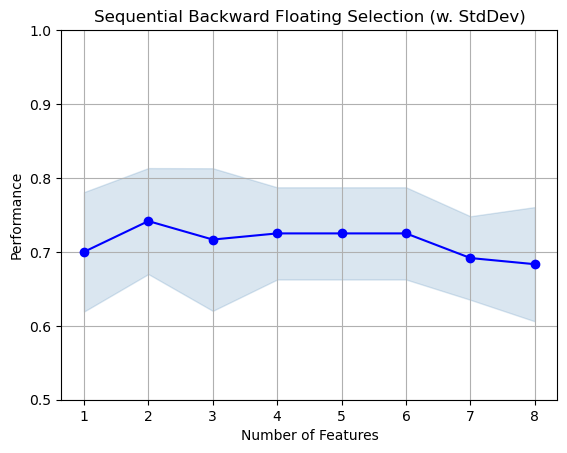

In [8]:
# plot results 

fig_sfs = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

fig_sbs = plot_sfs(sbs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

fig_sffs = plot_sfs(sffs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Floating Selection (w. StdDev)')
plt.grid()
plt.show()

fig_sbfs = plot_sfs(sbfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.5, 1])
plt.title('Sequential Backward Floating Selection (w. StdDev)')
plt.grid()
plt.show()

In [9]:
# create a dataframe with only the selected features
selected_columns = list(map(str,sfs.k_feature_names_))
x_train_selected = x_train[selected_columns]
x_test_selected = x_test[selected_columns]

### Hyper parameter grid search

In [10]:
# define parent construction
lr = linear_model.LogisticRegression(random_state=42)

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky']
penalty = ['l1', 'l2', 'elasticnet']
C = np.logspace(0, 5, 6) 

# define parameter dictionary
param_dict = {
    'solver': solver,                   
    'penalty': penalty, 
    'C': C
}

In [11]:
# execute grid search
grid = GridSearchCV(estimator = lr,
                   param_grid = param_dict, 
                    cv = cv,
                    verbose = 3
                   )
grid.fit(x_train_selected, y_train.values.ravel())

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.625 total time=   0.0s
[CV 2/5] END C=1.0, penalty=l1, solver=liblin

/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
300 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/linear_mod

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga', 'newton-cholesky']},
             verbose=3)

In [12]:
# organize grid search results for further exploration
lr_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(lr_grid_results) 

C     penalty           solver  Accuracy
6         1.0          l2        newton-cg  0.741667
7         1.0          l2            lbfgs  0.741667
8         1.0          l2        liblinear  0.741667
9         1.0          l2              sag  0.741667
10        1.0          l2             saga  0.741667
11        1.0          l2  newton-cholesky  0.741667
2         1.0          l1        liblinear  0.725000
81    10000.0          l2              sag  0.683333
63     1000.0          l2              sag  0.683333
64     1000.0          l2             saga  0.683333
65     1000.0          l2  newton-cholesky  0.683333
74    10000.0          l1        liblinear  0.683333
76    10000.0          l1             saga  0.683333
78    10000.0          l2        newton-cg  0.683333
79    10000.0          l2            lbfgs  0.683333
80    10000.0          l2        liblinear  0.683333
94   100000.0          l1             saga  0.683333
82    10000.0          l2             saga  0.683333
83    10000.0          l2  newton-cholesky  0.683333
92   100000.0          l1        liblinear  0.683333
61     1000.0          l2            lbfgs  0.683333
96   100000.0          l2        newton-cg  0.683333
97   100000.0          l2            lbfgs  0.683333
98   100000.0          l2        liblinear  0.683333
99   100000.0          l2              sag  0.683333
100  100000.0          l2             saga  0.683333
62     1000.0          l2        liblinear  0.683333
56     1000.0          l1        liblinear  0.683333
60     1000.0          l2        newton-cg  0.683333
43      100.0          l2            lbfgs  0.683333
22       10.0          l1             saga  0.683333
26       10.0          l2        liblinear  0.683333
58     1000.0          l1             saga  0.683333
40      100.0          l1             saga  0.683333
42      100.0          l2        newton-cg  0.683333
38      100.0          l1        liblinear  0.683333
44      100.0          l2        liblinear  0.683333
45      100.0          l2              sag  0.683333
46      100.0          l2             saga  0.683333
47      100.0          l2  newton-cholesky  0.683333
101  100000.0          l2  newton-cholesky  0.683333
29       10.0          l2  newton-cholesky  0.666667
28       10.0          l2             saga  0.666667
27       10.0          l2              sag  0.666667
25       10.0          l2            lbfgs  0.666667
24       10.0          l2        newton-cg  0.666667
20       10.0          l1        liblinear  0.666667
4         1.0          l1             saga  0.658333
0         1.0          l1        newton-cg       NaN
1         1.0          l1            lbfgs       NaN
3         1.0          l1              sag       NaN
5         1.0          l1  newton-cholesky       NaN
12        1.0  elasticnet        newton-cg       NaN
13        1.0  elasticnet            lbfgs       NaN
14        1.0  elasticnet        liblinear       NaN
15        1.0  elasticnet              sag       NaN
16        1.0  elasticnet             saga       NaN
17        1.0  elasticnet  newton-cholesky       NaN
18       10.0          l1        newton-cg       NaN
19       10.0          l1            lbfgs       NaN
21       10.0          l1              sag       NaN
23       10.0          l1  newton-cholesky       NaN
30       10.0  elasticnet        newton-cg       NaN
31       10.0  elasticnet            lbfgs       NaN
32       10.0  elasticnet        liblinear       NaN
33       10.0  elasticnet              sag       NaN
34       10.0  elasticnet             saga       NaN
35       10.0  elasticnet  newton-cholesky       NaN
36      100.0          l1        newton-cg       NaN
37      100.0          l1            lbfgs       NaN
39      100.0          l1              sag       NaN
41      100.0          l1  newton-cholesky       NaN
48      100.0  elasticnet        newton-cg       NaN
49      100.0  elasticnet            lbfgs       NaN
50      100.0  elasticnet        libl

### Hyper parameter and model setting

In [13]:
# indexing best parameters from GridSearchCV
hyper_lr = grid.best_params_

# print best hyperparamaters
print(hyper_lr)

# tune decision tree model using best hyper parameters
lr_tuned = linear_model.LogisticRegression(random_state = 42,
                                           max_iter=10000,
                                           solver = hyper_lr['solver'],
                                           penalty = hyper_lr['penalty'],
                                           C = hyper_lr['C'])

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


### Performance estimation for training data

In [14]:
# evaluate the tuned model
lr_tuned_score = cross_val_score(lr_tuned,
                                 x_train_selected,
                                 y_train.values.ravel(),
                                 cv=cv)

print('Accuracy scores:', np.round(lr_tuned_score, 2))
print('Average accuracy on training data:', lr_tuned_score.mean())

Accuracy scores: [0.62 0.71 0.75 0.83 0.79]
Average accuracy on training data: 0.7416666666666667


### Evaluate model with test data

In [15]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = lr_tuned.fit(x_train_selected, y_train.values.ravel()).predict(x_test_selected)
yprob = lr_tuned.fit(x_train_selected, y_train.values.ravel()).predict_proba(x_test_selected)

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[1, 1]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:,1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round((tp+tn)/(tp+tn+fp+fn), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

AUROC 0.6
Tuned model accuracy on testing data: 0.56
Sensitivity 0.59
Specficity 0.53
Precision 0.53


### Print coefficients

In [16]:
list1 = x_train_selected.columns.tolist()
list2 = lr_tuned.coef_.ravel().tolist()

coefs = pd.DataFrame({'feature': list1, 'coefficient': list2})

display(coefs)

feature  coefficient
0    soil type    -0.658229
1  MA_SumSM_IR     2.164059

## Alg 2: Decision Tree

In [17]:
# packages import
from numpy import mean
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

### Hyper parameter grid search

In [18]:
# define parent construction
dt = DecisionTreeClassifier(random_state=42)

criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best']
max_depth = range(7,13,1)
min_samples_split = range(3,10)
min_samples_leaf = range(3,5)

    
# define parameter dictionary
param_dict = {
    'criterion': criterion,
    'splitter': splitter,
    'max_depth':max_depth, 
    'min_samples_split':min_samples_split, 
    'min_samples_leaf':min_samples_leaf
}

# parameters not included in GridSearchCV:
    # min_weight_fraction: minimum weighted fraction of the sum total of weights (of all the input samples) required
        # to be a leaf node. Samples have equal weight when sample_weight is not provided.
    # max_features: the number of features to consider when looking for the best split (default = None)
    # max_leaf_nodes: grow a tree with max leaf nodes in best-first fashion. If none, then unlimited number of leaf nodes
    # min_impurity_decrease: a node will be split if this split induces a decrease of the impurity greater than or equal
        # to this value (default = 0.0)
    # class weight: weights associated with class lables. If none, all classes are supposed to have weight one
    # ccp alpha: complexity parameter used for minimal cost-complexity pruning

In [19]:
# execute grid search
grid = GridSearchCV(estimator = dt,
                   param_grid = param_dict,
                    cv = cv,
                    verbose = 3
                   )
grid.fit(x_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.667 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.667 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.667 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.542 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.667 total time=   0.0s
[CV 3/5] END criterion=gin

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(7, 13),
                         'min_samples_leaf': range(3, 5),
                         'min_samples_split': range(3, 10),
                         'splitter': ['best']},
             verbose=3)

In [20]:
# organize grid search results for further exploration
dt_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(dt_grid_results)

criterion  max_depth  min_samples_leaf  min_samples_split splitter  \
174  log_loss          7                 3                  9     best   
90    entropy          7                 3                  9     best   
168  log_loss          7                 3                  3     best   
84    entropy          7                 3                  3     best   
173  log_loss          7                 3                  8     best   
172  log_loss          7                 3                  7     best   
171  log_loss          7                 3                  6     best   
170  log_loss          7                 3                  5     best   
169  log_loss          7                 3                  4     best   
48       gini         10                 3                  9     best   
20       gini          8                 3                  9     best   
62       gini         11                 3                  9     best   
76       gini         12                 3                  9     best   
89    entropy          7                 3                  8     best   
88    entropy          7                 3                  7     best   
87    entropy          7                 3                  6     best   
86    entropy          7                 3                  5     best   
34       gini          9                 3                  9     best   
85    entropy          7                 3                  4     best   
6        gini          7                 3                  9     best   
104   entropy          8                 3                  9     best   
202  log_loss          9                 3                  9     best   
188  log_loss          8                 3                  9     best   
118   entropy          9                 3                  9     best   
132   entropy         10                 3                  9     best   
216  log_loss         10                 3                  9     best   
91    entropy          7                 4                  3     best   
94    entropy          7                 4                  6     best   
95    entropy          7                 4                  7     best   
96    entropy          7                 4                  8     best   
97    entropy          7                 4                  9     best   
92    entropy          7                 4                  4     best   
93    entropy          7                 4                  5     best   
175  log_loss          7                 4                  3     best   
176  log_loss          7                 4                  4     best   
177  log_loss          7                 4                  5     best   
178  log_loss          7                 4                  6     best   
179  log_loss          7                 4                  7     best   
180  log_loss          7                 4                  8     best   
181  log_loss          7                 4                  9     best   
59       gini         11                 3                  6     best   
61       gini         11                 3                  8     best   
58       gini         11                 3                  5     best   
60       gini         11                 3                  7     best   
19       gini          8                 3                  8     best   
70       gini         12                 3                  3     best   
71       gini         12                 3                  4     best   
57       gini         11                 3                  4     best   
73       gini         12                 3                  6     best   
74       gini         12                 3                  7     best   
75       gini         12                 3                  8     best   
5        gini          7                 3                  8     best   
4        gini          7                 3                  7     best   
3       

### Hyper parameter and model setting

In [21]:
# indexing best parameters from GridSearchCV
hyper_dt = grid.best_params_

# print best hyperparamaters
print(hyper_dt)

# tune decision tree model using best hyper parameters
dt_tuned = DecisionTreeClassifier(random_state=42,
                                  criterion = hyper_dt['criterion'],
                                  splitter = hyper_dt['splitter'],
                                 max_depth = hyper_dt['max_depth'],
                                 min_samples_leaf= hyper_dt['min_samples_leaf'],
                                  min_samples_split = hyper_dt['min_samples_split']
                                 )

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 9, 'splitter': 'best'}


### Performance estimation for training data

In [22]:
# evaluate the tuned model
dt_tuned_train_result = cross_val_score(dt_tuned,
                                    x_train,
                                    y_train,
                                    cv=cv)

print('Accuracy scores:', np.round(dt_tuned_train_result, 2))
print('Average accuracy on training data:', dt_tuned_train_result.mean())

Accuracy scores: [0.62 0.62 0.62 0.79 0.67]
Average accuracy on training data: 0.6666666666666666


### Evaluate model with test data

In [23]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = dt_tuned.fit(x_train, y_train.values.ravel()).predict(x_test)
yprob = dt_tuned.fit(x_train, y_train.values.ravel()).predict_proba(x_test)

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[1, 1]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:,1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round((tp+tn)/(tp+tn+fp+fn), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

AUROC 0.89
Tuned model accuracy on testing data: 0.89
Sensitivity 0.94
Specficity 0.84
Precision 0.84


### Extract feature importance

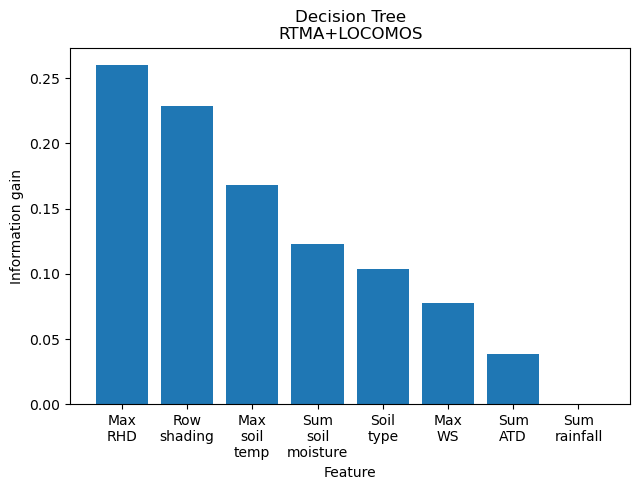

In [26]:
importances = dt_tuned.feature_importances_
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# plot the feature importances
plt.figure(figsize=(6.5, 5))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature')
plt.ylabel('Information gain')
plt.title('Decision Tree\nRTMA+LOCOMOS')
plt.tight_layout()
plt.savefig("DT - corr - LX - FI.png", dpi = 1200)
plt.show()

## Alg 3: Random Forest

In [17]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix

### Hyper parameter grid search

In [18]:
# define parent construction
rf = RandomForestClassifier(random_state=42)

n_estimators = [int(x) for x in np.linspace(start=20, stop=30, num=10)]
criterion = ['entropy', 'log_loss', 'gini']
max_depth = range(7, 11)
min_samples_split = range(5,10)
min_samples_leaf = range(3,5)
bootstrap = [True]
ccp_alpha = (0, 0.001, 0.01)

# define parameter dictionary
param_dict = {'n_estimators': n_estimators,
              'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'ccp_alpha': ccp_alpha
             }   

### Hyper parameter and model setting

In [19]:
grid = GridSearchCV(estimator=rf,
                    param_grid=param_dict,
                    cv=cv,
                    verbose=3)
grid.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
[CV 1/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.583 total time=   0.0s
[CV 2/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.708 total time=   0.0s
[CV 3/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.792 total time=   0.0s
[CV 4/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.750 total time=   0.0s
[CV 5/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.708 total time=   0.0s
[CV 1/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=21;, score=0.583 total time=   0.0s
[CV 2/5] END ccp_alpha=0, criterion=entropy, m

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': (0, 0.001, 0.01),
                         'criterion': ['entropy', 'log_loss', 'gini'],
                         'max_depth': range(7, 11),
                         'min_samples_leaf': range(3, 5),
                         'min_samples_split': range(5, 10),
                         'n_estimators': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                          30]},
             verbose=3)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(5, 10),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(2, 5),
                         'n_estimators': [20, 25, 30, 35, 40]},
             verbose=3)

In [20]:
# organize grid search results for further exploration
rf_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(rf_grid_results)

ccp_alpha criterion  max_depth  min_samples_leaf  min_samples_split  \
3509      0.010      gini         10                 3                  5   
3409      0.010      gini          9                 3                  5   
3519      0.010      gini         10                 3                  6   
3419      0.010      gini          9                 3                  6   
2379      0.001      gini         10                 4                  7   
2289      0.001      gini          9                 4                  8   
2259      0.001      gini          9                 4                  5   
3307      0.010      gini          8                 3                  5   
3308      0.010      gini          8                 3                  5   
3309      0.010      gini          8                 3                  5   
3408      0.010      gini          9                 3                  5   
2159      0.001      gini          8                 4                  5   
2079      0.001      gini          7                 4                  7   
3407      0.010      gini          9                 3                  5   
2269      0.001      gini          9                 4                  6   
3518      0.010      gini         10                 3                  6   
3517      0.010      gini         10                 3                  6   
2169      0.001      gini          8                 4                  6   
3317      0.010      gini          8                 3                  6   
3318      0.010      gini          8                 3                  6   
3319      0.010      gini          8                 3                  6   
2389      0.001      gini         10                 4                  8   
3507      0.010      gini         10                 3                  5   
2069      0.001      gini          7                 4                  6   
3508      0.010      gini         10                 3                  5   
2369      0.001      gini         10                 4                  6   
2179      0.001      gini          8                 4                  7   
3217      0.010      gini          7                 3                  6   
3418      0.010      gini          9                 3                  6   
2359      0.001      gini         10                 4                  5   
2059      0.001      gini          7                 4                  5   
2089      0.001      gini          7                 4                  8   
2189      0.001      gini          8                 4                  8   
3208      0.010      gini          7                 3                  5   
3417      0.010      gini          9                 3                  6   
3207      0.010      gini          7                 3                  5   
2279      0.001      gini          9                 4                  7   
3218      0.010      gini          7                 3                  6   
2839      0.010  log_loss          7                 3                  8   
1677      0.001  log_loss          7                 4                  7   
2977      0.010  log_loss          8                 4                  7   
2539      0.010   entropy          8                 3                  8   
1676      0.001  log_loss          7                 4                  7   
2957      0.010  log_loss          8                 4                  5   
566       0.000  log_loss          8                 4                  6   
557       0.000  log_loss          8                 4                  5   
1257      0.001   entropy          7                 4                  5   
1256      0.001   entropy          7                 4                  5   
2457      0.010   entropy          7                 4                  5   
1487      0.001   entropy          9                 4                  8   
556       0.000  log_loss          8                 4                  5   
25

In [21]:
# indexing best parameters from GridSearchCV
hyper_rf = grid.best_params_

# print best hyperparamaters
print(hyper_rf)

# tune decision tree model using best hyper parameters
rf_tuned = RandomForestClassifier(random_state=42,
    n_estimators = hyper_rf["n_estimators"],
    min_samples_split = hyper_rf["min_samples_split"],
    min_samples_leaf = hyper_rf["min_samples_leaf"],
    max_depth = hyper_rf["max_depth"]
                                 )

{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}


### Performance estimation for training data

In [22]:
# evaluate the tuned model
rf_tuned_train_result = cross_val_score(rf_tuned,
                                        x_train,
                                        y_train.values.ravel(),
                                        cv=cv)

print('Accuracy scores:', np.round(rf_tuned_train_result, 2))
print('Average accuracy on training data:', rf_tuned_train_result.mean())

Accuracy scores: [0.67 0.71 0.75 0.75 0.79]
Average accuracy on training data: 0.7333333333333333


### Evaluate model with test data

In [23]:
# using tuned model to make y test data preditions using x test data inputs
ypred = rf_tuned.fit(x_train, y_train.values.ravel()).predict(x_test)
yprob = rf_tuned.fit(x_train, y_train.values.ravel()).predict_proba(x_test)

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[0, 0]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:,1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round((tp+tn)/(tp+tn+fp+fn), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

AUROC 0.76
Tuned model accuracy on testing data: 0.67
Sensitivity 0.6
Specficity 0.73
Precision 0.69


## Alg 4: Support Vector Machine

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Hyperparameter grid search

In [29]:
# define the parent construction
svm = SVC(random_state=42)

C = [0.1, 1, 10]
kernel = ['linear', 'rbf', 'poly']
gamma = ['scale', 'auto']
degree = [1, 2, 3, 4, 5]
decision_function_shape = ['ovo', 'ovr']

# define parameter dictionary
param_dict = {
    'C': C,
    'kernel': kernel,
    'gamma': gamma,
    'degree': degree,
    'decision_function_shape': decision_function_shape
}

In [30]:
# execute grid search
grid = GridSearchCV(estimator = svm,
                    param_grid = param_dict, # mapping parameter dictionary defined earlier
                    cv = cv, 
                    verbose = 3 # option 3 outputs scores for each test
                   )
grid.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=linear;, score=0.542 total time=   0.0s
[CV 2/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=linear;, score=0.667 total time=   0.0s
[CV 3/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=linear;, score=0.625 total time=   0.0s
[CV 4/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=linear;, score=0.625 total time=   0.0s
[CV 5/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=linear;, score=0.625 total time=   0.0s
[CV 1/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=rbf;, score=0.583 total time=   0.0s
[CV 2/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=rbf;, score=0.708 total time=  

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [31]:
# organize grid search results for further exploration
svm_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(svm_grid_results)

C decision_function_shape  degree  gamma  kernel  Accuracy
56    0.1                     ovr       5  scale    poly  0.783333
26    0.1                     ovo       5  scale    poly  0.783333
14    0.1                     ovo       3  scale    poly  0.775000
44    0.1                     ovr       3  scale    poly  0.775000
80    1.0                     ovo       4  scale    poly  0.766667
110   1.0                     ovr       4  scale    poly  0.766667
98    1.0                     ovr       2  scale    poly  0.750000
68    1.0                     ovo       2  scale    poly  0.750000
134  10.0                     ovo       3  scale    poly  0.750000
164  10.0                     ovr       3  scale    poly  0.750000
86    1.0                     ovo       5  scale    poly  0.741667
116   1.0                     ovr       5  scale    poly  0.741667
140  10.0                     ovo       4  scale    poly  0.741667
158  10.0                     ovr       2  scale    poly  0.741667
128  10.0                     ovo       2  scale    poly  0.741667
170  10.0                     ovr       4  scale    poly  0.741667
154  10.0                     ovr       1   auto     rbf  0.733333
136  10.0                     ovo       3   auto     rbf  0.733333
178  10.0                     ovr       5   auto     rbf  0.733333
148  10.0                     ovo       5   auto     rbf  0.733333
74    1.0                     ovo       3  scale    poly  0.733333
130  10.0                     ovo       2   auto     rbf  0.733333
104   1.0                     ovr       3  scale    poly  0.733333
142  10.0                     ovo       4   auto     rbf  0.733333
50    0.1                     ovr       4  scale    poly  0.733333
124  10.0                     ovo       1   auto     rbf  0.733333
20    0.1                     ovo       4  scale    poly  0.733333
160  10.0                     ovr       2   auto     rbf  0.733333
172  10.0                     ovr       4   auto     rbf  0.733333
166  10.0                     ovr       3   auto     rbf  0.733333
112   1.0                     ovr       4   auto     rbf  0.725000
70    1.0                     ovo       2   auto     rbf  0.725000
64    1.0                     ovo       1   auto     rbf  0.725000
76    1.0                     ovo       3   auto     rbf  0.725000
82    1.0                     ovo       4   auto     rbf  0.725000
118   1.0                     ovr       5   auto     rbf  0.725000
88    1.0                     ovo       5   auto     rbf  0.725000
100   1.0                     ovr       2   auto     rbf  0.725000
94    1.0                     ovr       1   auto     rbf  0.725000
106   1.0                     ovr       3   auto     rbf  0.725000
149  10.0                     ovo       5   auto    poly  0.716667
101   1.0                     ovr       2   auto    poly  0.716667
71    1.0                     ovo       2   auto    poly  0.716667
179  10.0                     ovr       5   auto    poly  0.716667
77    1.0                     ovo       3   auto    poly  0.708333
113   1.0                     ovr       4   auto    poly  0.708333
107   1.0                     ovr       3   auto    poly  0.708333
83    1.0                     ovo       4   auto    poly  0.708333
109   1.0                     ovr       4  scale     rbf  0.708333
73    1.0                     ovo       3  scale     rbf  0.708333
85    1.0                     ovo       5  scale     rbf  0.708333
61    1.0                     ovo       1  scale     rbf  0.708333
67    1.0                     ovo       2  scale     rbf  0.708333
91    1.0                     ovr       1  scale     rbf  0.708333
103   1.0                     ovr       3  scale     rbf  0.708333
79    1.0                     ovo       4  scale     rbf  0.708333
115   1.0                     ovr       5  scale     rbf  0.708333
97    1.0                     ovr       2  scale     rbf  0.708333
89    1.0                     ovo       5   auto    pol

### Hyperparameter and model setting

In [32]:
# indexing best parameters from GridSearchCV
hyper_params = grid.best_params_

# print best hyperparamaters
print("Best Hyperparameters:", hyper_params)

# tune model using best hyper parameters
svm_tuned = SVC(random_state=42,
                C = hyper_params['C'],
                kernel = hyper_params['kernel'],
                gamma = hyper_params['gamma'],
                degree = hyper_params['degree'],
               probability = True)

Best Hyperparameters: {'C': 0.1, 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}


### Performance estimation for training data

In [33]:
# evaluate the tuned model
svm_tuned_train_result = cross_val_score(svm_tuned,
                                    x_train,
                                    y_train.values.ravel(),
                                    cv=cv)

print('Accuracy scores:', np.round(svm_tuned_train_result, 2))
print('Average accuracy on training data:', svm_tuned_train_result.mean())

Accuracy scores: [0.62 0.79 0.75 0.92 0.83]
Average accuracy on training data: 0.7833333333333333


### Evaluate model with test data

In [34]:
# using tuned model to make y test data preditions using x test data inputs
ypred = svm_tuned.fit(x_train, y_train.values.ravel()).predict(x_test)
yprob = svm_tuned.fit(x_train, y_train.values.ravel()).predict_proba(x_test)

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[0, 0]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:,1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round((tp+tn)/(tp+tn+fp+fn), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

AUROC 0.92
Tuned model accuracy on testing data: 0.73
Sensitivity 0.65
Specficity 0.85
Precision 0.85


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix

y_train = np.ravel(y_train) # target data must be a 1-D array, not a single column vector

### Hyper parameter grid search

In [ ]:
# define the parent construction
mlp = MLPClassifier(max_iter=10000, random_state=42)

# definition
hidden_layer_sizes = [10, 15, 20, 30]
# definition
activation = ['logistic', 'tanh', 'relu']
# definition
alpha = [0.0001, 0.001, 0.01]
         
# define parameter dictionary
param_dict = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': activation,
    'alpha': alpha
}

# parameters not included in GridSearchCV:
    # ...

In [ ]:
# execute grid search
grid = GridSearchCV(estimator = mlp, 
                           param_grid = param_dict, 
                           cv=cv, 
                           verbose = 3)
grid.fit(x_train, y_train)

In [ ]:
# organize grid search results for further exploration
mlp_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(mlp_grid_results)

### Hyper parameter and model setting 

In [ ]:
# indexing best parameters from GridSearchCV
hyper_mlp = grid.best_params_

# print best hyperparamaters
print(hyper_mlp)

# tune decision tree model using best hyper parameters
mlp_tuned = MLPClassifier(random_state=42,
                          hidden_layer_sizes = hyper_mlp['hidden_layer_sizes'],
                                 activation = hyper_mlp['activation'],
                                 alpha = hyper_mlp['alpha'])

### Performance estimation for training data

In [ ]:
# evaluate the tuned model
tuned_model_result = cross_val_score(mlp_tuned,
                                    x_train,
                                    y_train,
                                    cv=cv)

# display the tuned model accurary as a percentage
print('Tuned model accuracy on training data:', tuned_model_result.mean())

### Evaluate model with test data

In [ ]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = mlp_tuned.fit(x_train, y_train).predict(x_test)

# assessing accuracy of tuned model on test data
mlp_tuned_score = mlp_tuned.score(x_test, y_test)

# print results
print('Tuned model accuracy on testing data:', mlp_tuned_score)
print('Confusion matrix\n', confusion_matrix(y_test, ypred))

### Pickle models

In [ ]:
import pickle

In [ ]:
# Pickle models

pickle.dump(lr_tuned, open('Models/LR_corr_LX.pkl','wb'))
pickle.dump(dt_tuned, open('Models/DT_corr_LX.pkl','wb'))
pickle.dump(rf_tuned, open('Models/RF_corr_LX.pkl','wb'))
pickle.dump(svm_tuned, open('Models/SVM_corr_LX.pkl','wb'))